In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
import os
import time

In [2]:
KEYS_N = 10000000

BLOCK_SIZE = 32

In [4]:
#generate words

texts = ["test_input/hamlet.txt"]

words_file     = open("test_input/words.txt", "w")
words_file_bin = open("test_input/words_bin.txt", "w")

words_set = set()

for text in texts:

    file = open(text, "r")

    raw = file.read()

    file.close()

    word = ""
    for c in raw:
        if c.isalpha() or c == "'":
            word += c

        elif len(word) != 0:

            words_set.add(word)

            words_file.write(word + "\n")
            words_file_bin.write(word + "\0" * (BLOCK_SIZE - len(word)))
            word = ""


words_file.close()
words_file_bin.close()

print(len(words_set))


5414


In [ ]:
# generate keys

words_dict_file = open("test_input/english_words_dict.txt", "r")
words_dict = words_dict_file.read().split("\n")[:-2]

words_dict_file.close()

words_file = open("test_input/words.txt", "r")
words = words_file.read().split("\n")[:-2]
words_file.close()

keys_file     = open("test_input/keys.txt", "w")
keys_bin_file = open("test_input/keys_bin.txt", "w")

for i in range(KEYS_N):
    out = ""

    if random.randint(0, 1):
        out = random.choice(words)
    else:
        out = random.choice(words_dict)
        while len(out) >= BLOCK_SIZE:
            out = random.choice(words_dict)

        if random.randint(0, 1):
            out = out[0].upper() + out[1:]

    keys_bin_file.write(out + "\0" * (BLOCK_SIZE - len(out)))
    keys_file.write(out + "\n")

keys_bin_file.write("\0")

keys_file.close()
keys_bin_file.close()

In [3]:
def make_hist(index, datas, xmax, ymax, ybreak, title):
    data = datas[index]

    is_x_trimmed = True

    if xmax == 0:
        xmax = len(data) + 4
        is_x_trimmed = False

    mpl.rcParams['font.size'] = 16

    if ybreak:
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, height_ratios=[max(max(data), ymax) - ybreak[1], ybreak[0]])
    else:
        fig, ax1 = plt.subplots(1, 1, sharex=True)

    fig.set_size_inches(13, 9)

    ax1.bar(range(len(data)), data, align = 'center', width=1.0)

    if ybreak:
        ax2.bar(range(len(data)), data, align = 'center', width=1.0)

        ax1.set_ylim(ymin = ybreak[1])  # outliers only
        ax2.set_ylim(ymax = ybreak[0])  # most of the data

        fig.subplots_adjust(hspace=0.15)  # adjust space between axes

        if is_x_trimmed:
            ax2.spines.right.set_linestyle((0, (30, 10, 1, 10)))

        ax1.spines.bottom.set_visible(False)
        ax2.spines.top.set_visible(False)
        ax1.xaxis.tick_top()
        ax1.tick_params(labeltop=False)  # don't put tick labels at the top
        ax2.xaxis.tick_bottom()

        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                      linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
        ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

        ax2.set_xlim(0 - 5, xmax)

    if is_x_trimmed:
        ax1.spines.right.set_linestyle((0, (30, 10, 1, 10)))

    fig.supxlabel("Table cell")
    fig.supylabel("Number of words in table cell")

    fig.suptitle(title, x = 0.11, horizontalalignment = 'left')



    ax1.plot([], [], ' ', label="table size = {}".format(len(data)))
    ax1.plot([], [], ' ', label="mean = %.1f" % (np.mean(data)))
    ax1.plot([], [], ' ', label="variation = %.1f" % (np.var(data)))
    ax1.legend(handlelength=0, handletextpad=0, fancybox=True, loc = "upper right")

    fig.tight_layout()
    ax1.set_xlim(0 - 5, xmax)
    if ymax != 0:
        ax1.set_ylim(ymax = ymax)

    plt.savefig("../img/hist{}.png".format(index))
    plt.show()

In [4]:
hashes_test_file = open("test_output/hashes_test.txt", "r")
hashes_test_lines = hashes_test_file.readlines()
hashes_test_file.close()

results = []

i = 0
while i < len(hashes_test_lines):
    n = int(hashes_test_lines[i])

    results.append([])

    for j in range(n):
        i += 1
        results[-1].append(int(hashes_test_lines[i]))

    i += 1


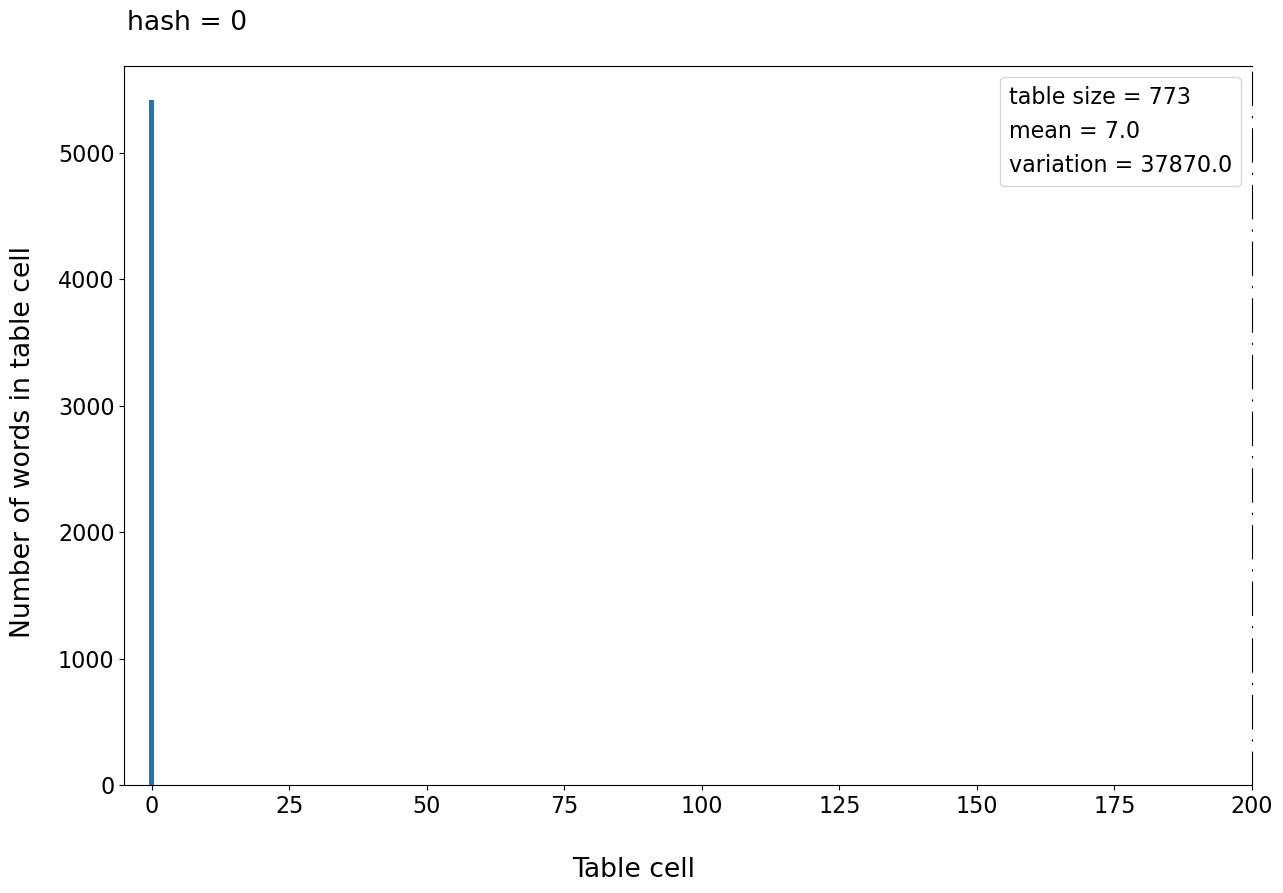

In [5]:
make_hist(0, results, 200, 0, 0, r"hash = 0")

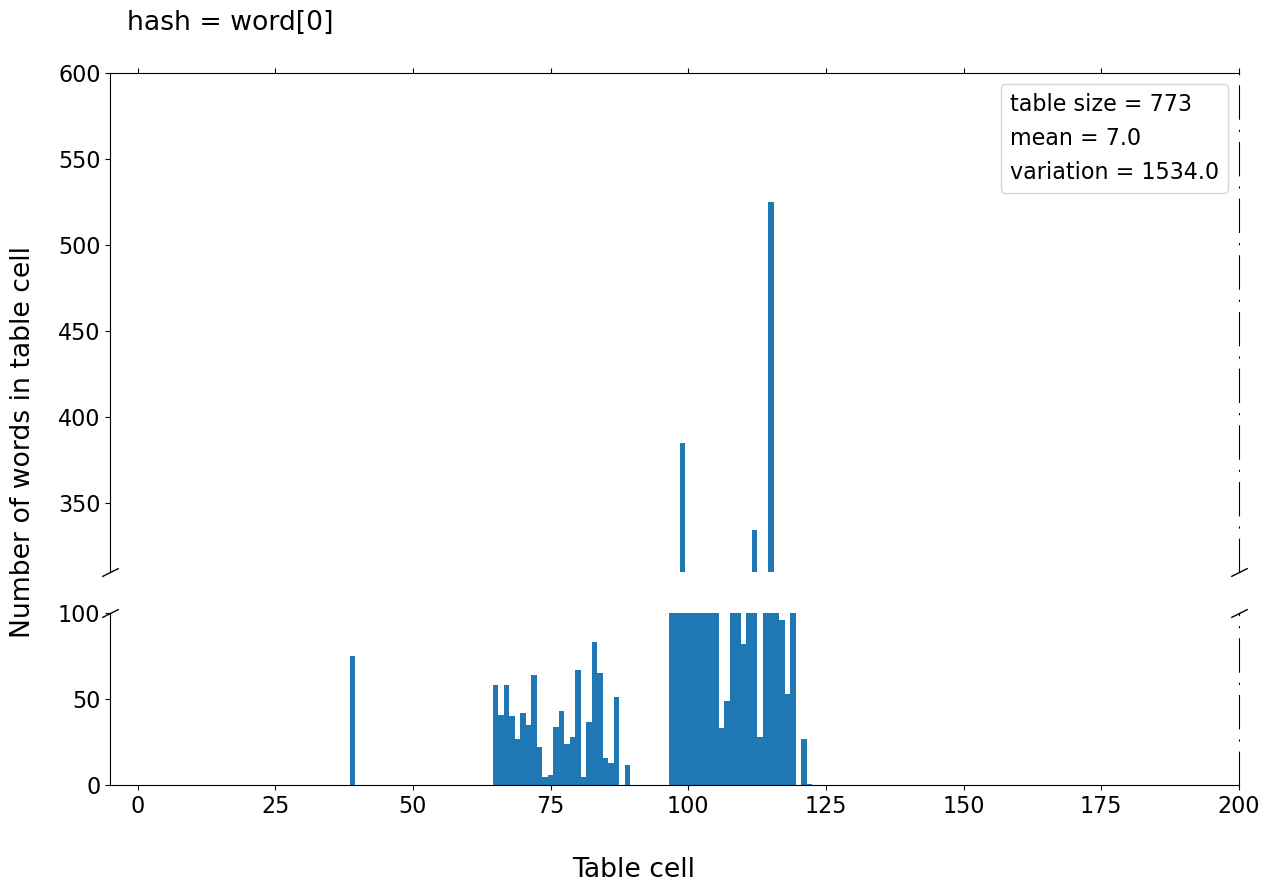

In [6]:
make_hist(1, results, 200, 600, [100, 310], "hash = word[0]")


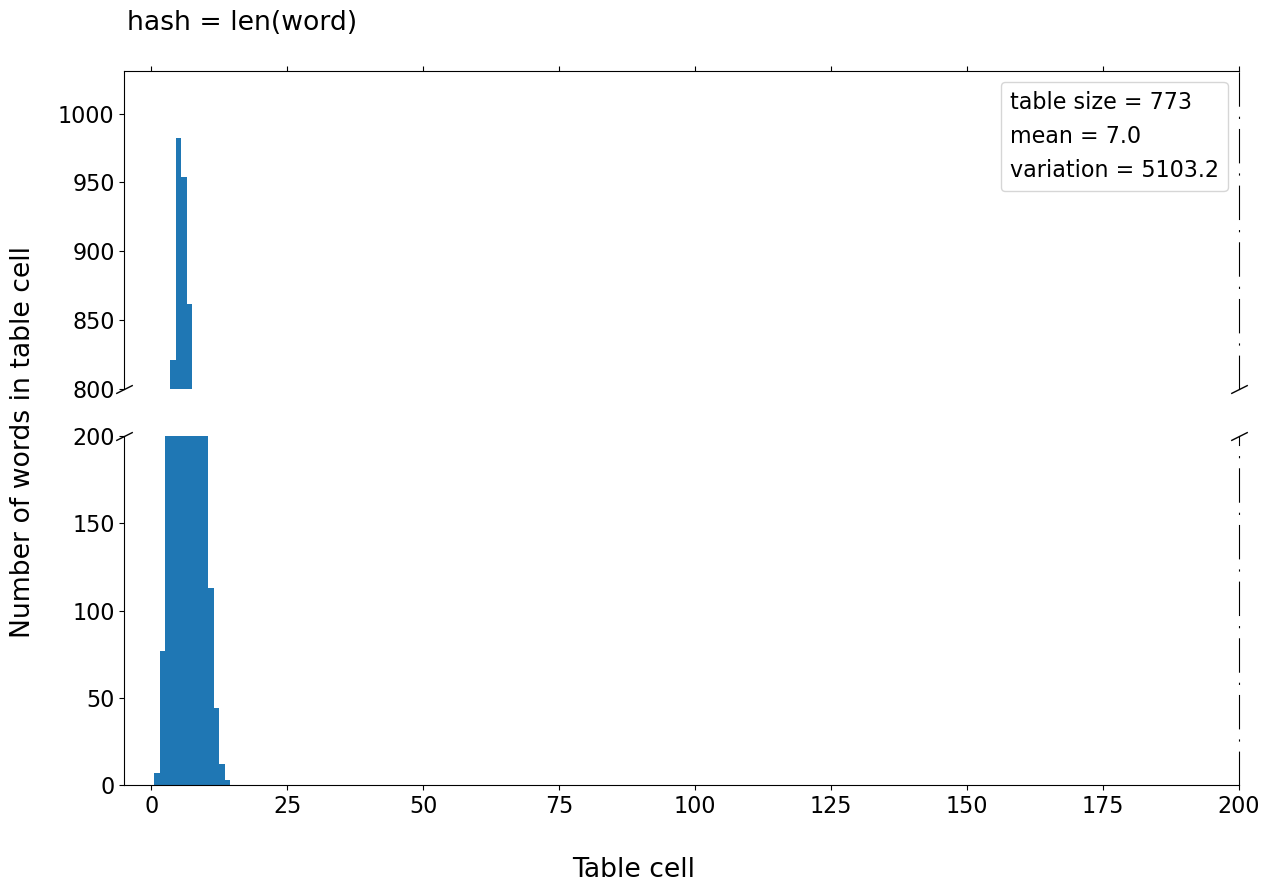

In [469]:
make_hist(2, results, 200, 0, [200, 800], r"hash = len(word)")

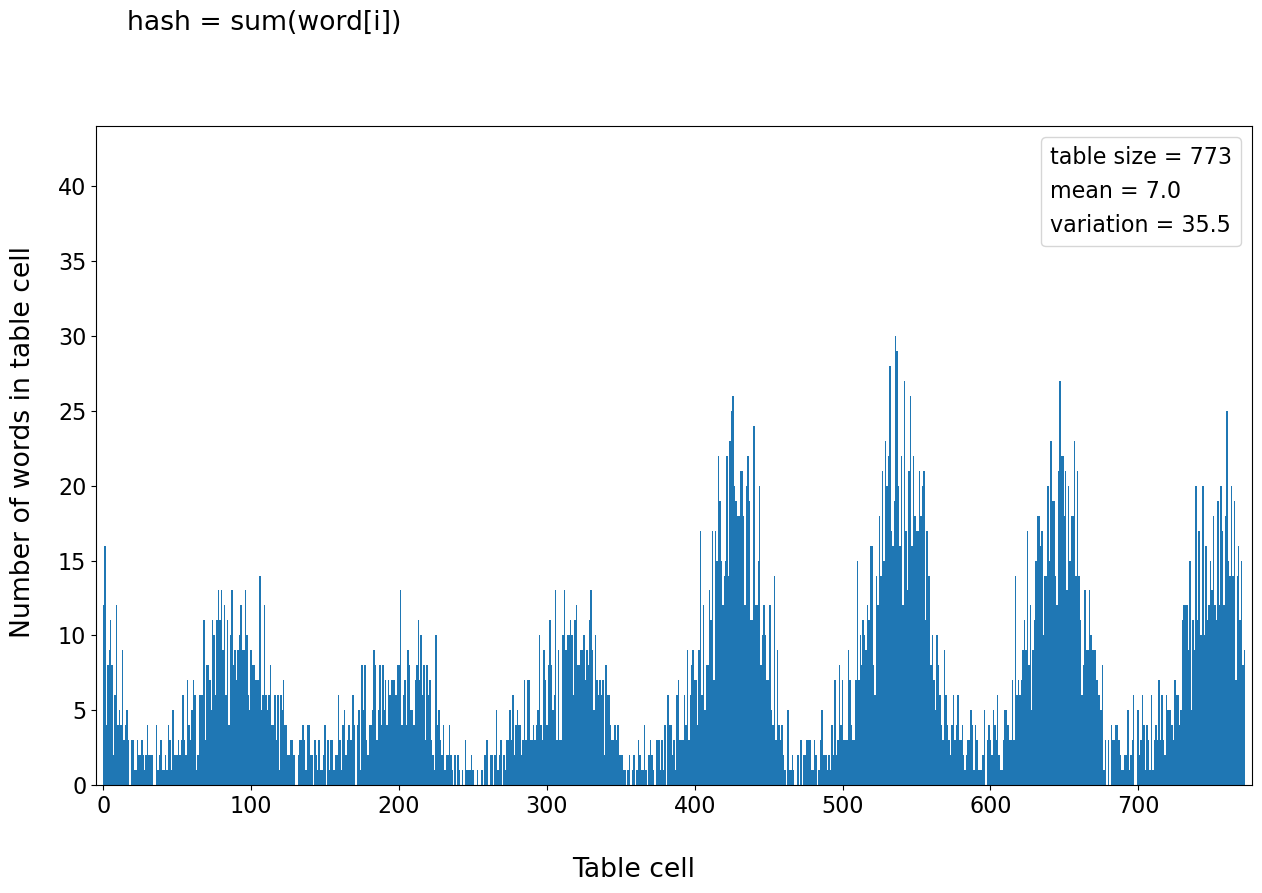

In [470]:
make_hist(3, results, 0, 44, 0, "hash = sum(word[i])\n\n")

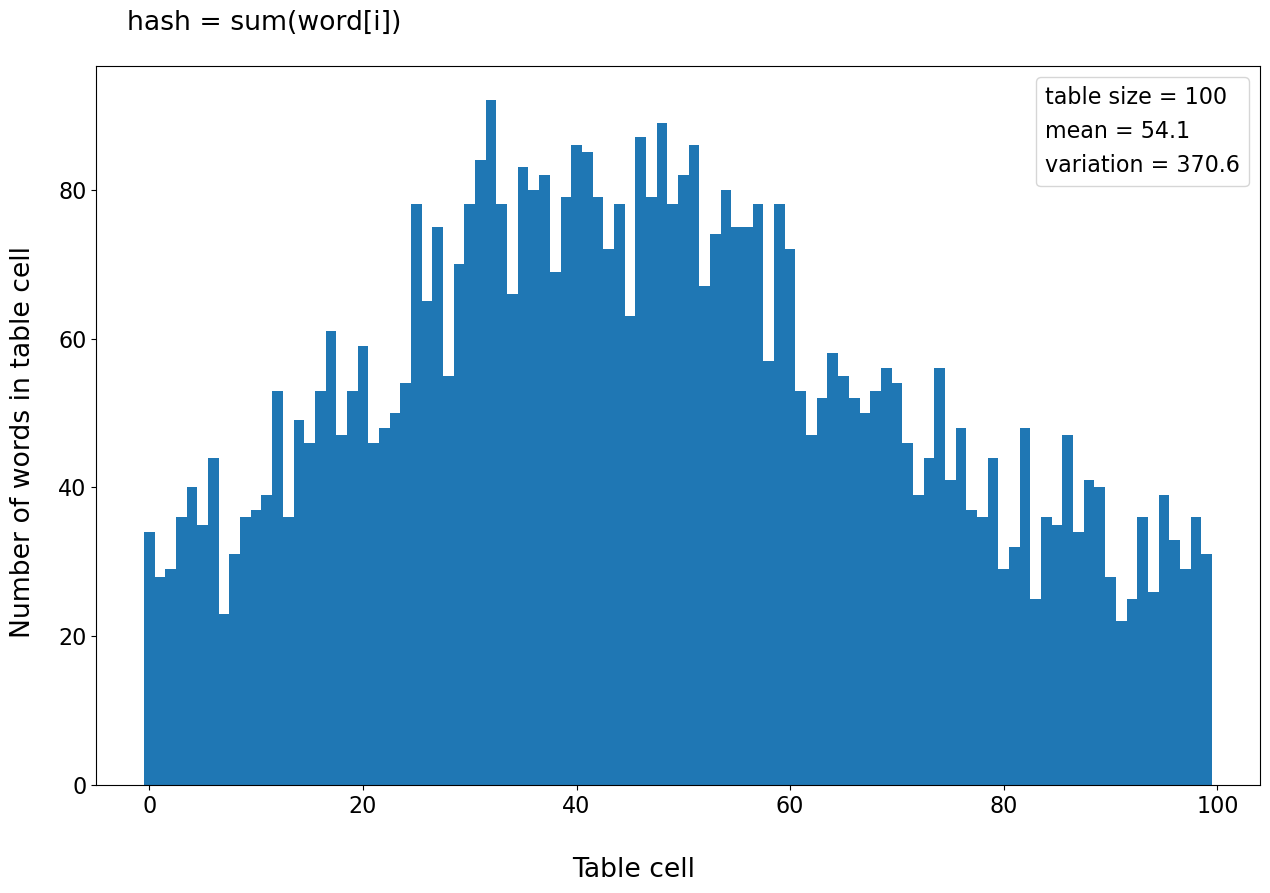

In [471]:
make_hist(4, results, 0, 0, 0, r"hash = sum(word[i])")

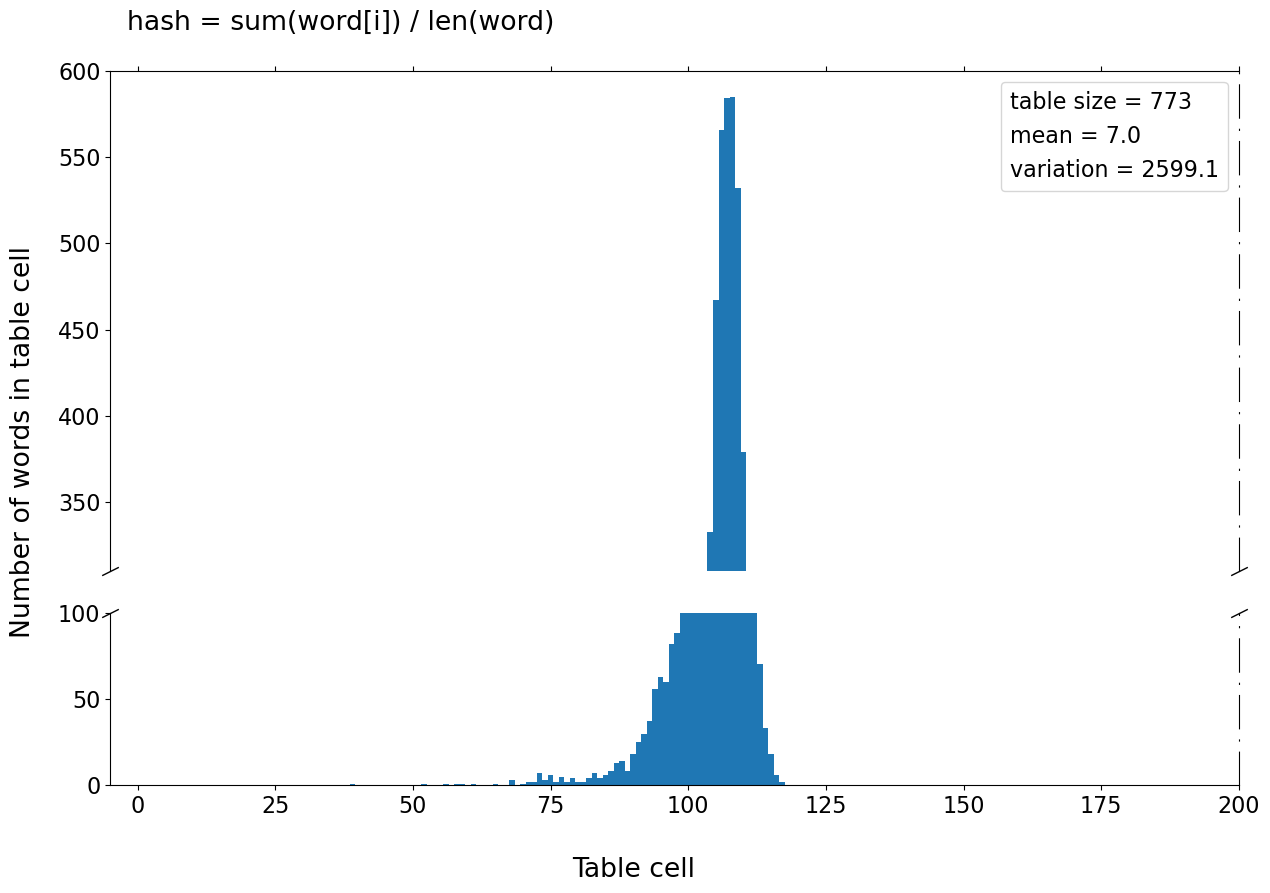

In [472]:
make_hist(5, results, 200, 600, [100, 310], "hash = sum(word[i]) / len(word)")

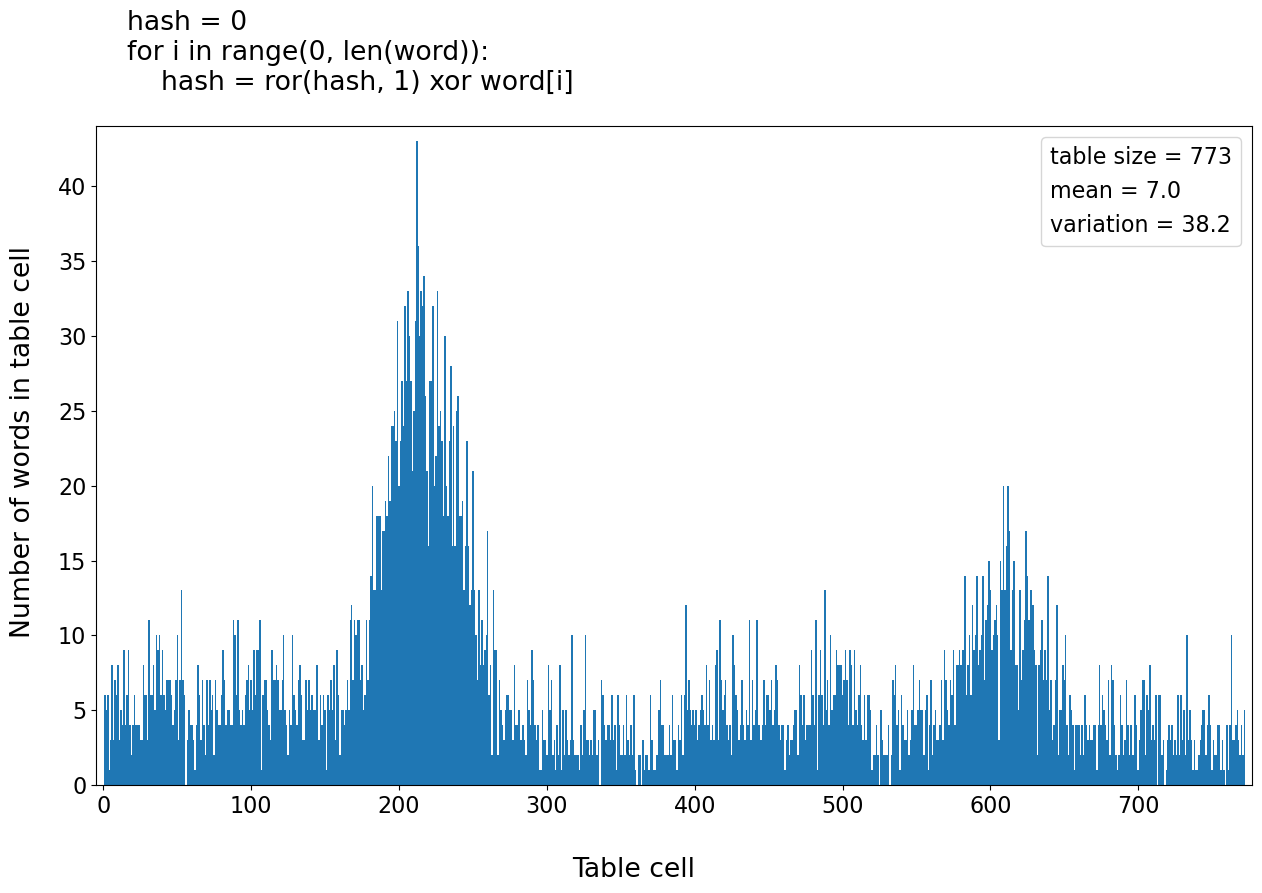

In [473]:
make_hist(6, results, 0, 44, 0, "hash = 0\nfor i in range(0, len(word)):\n    hash = ror(hash, 1) xor word[i]")

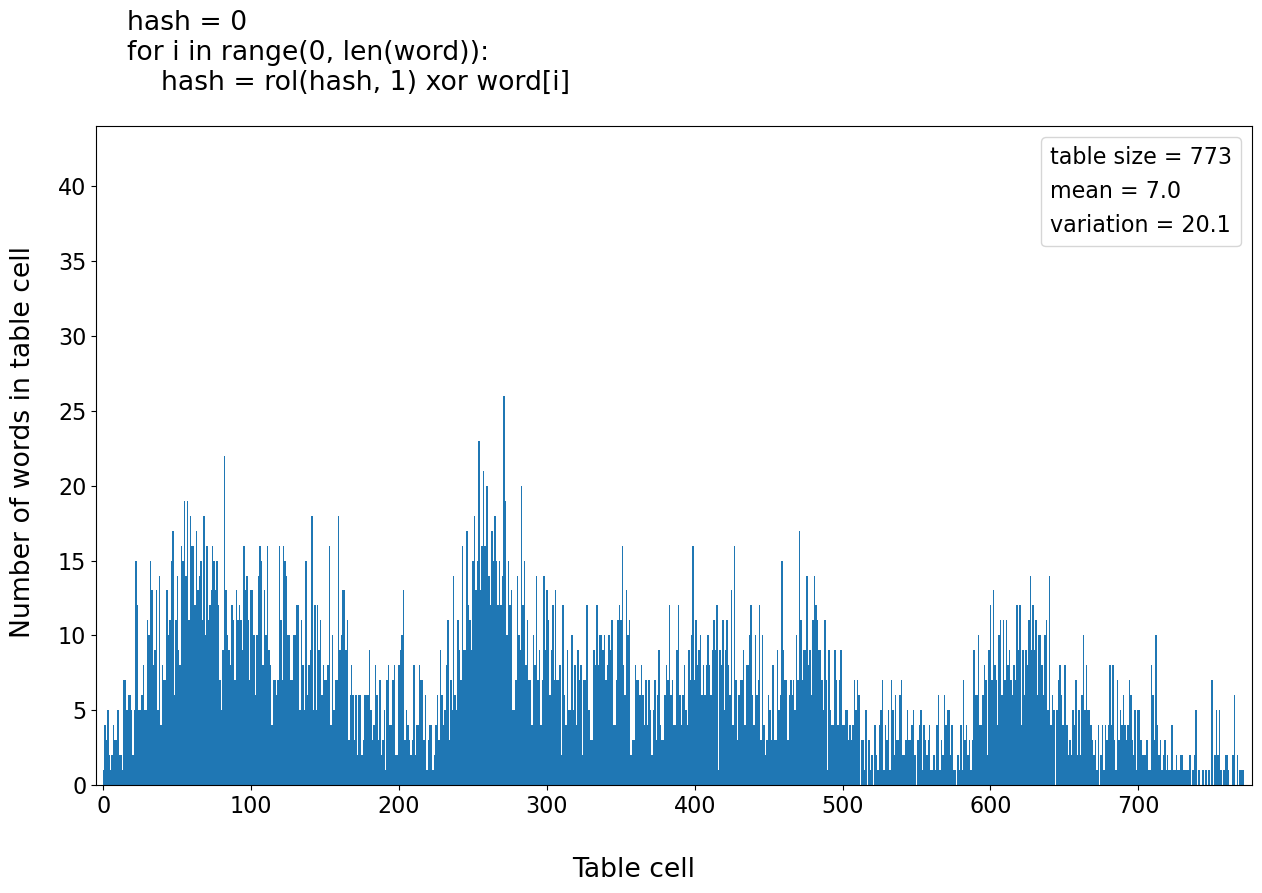

In [474]:
make_hist(7, results, 0, 44, 0, "hash = 0\nfor i in range(0, len(word)):\n    hash = rol(hash, 1) xor word[i]")

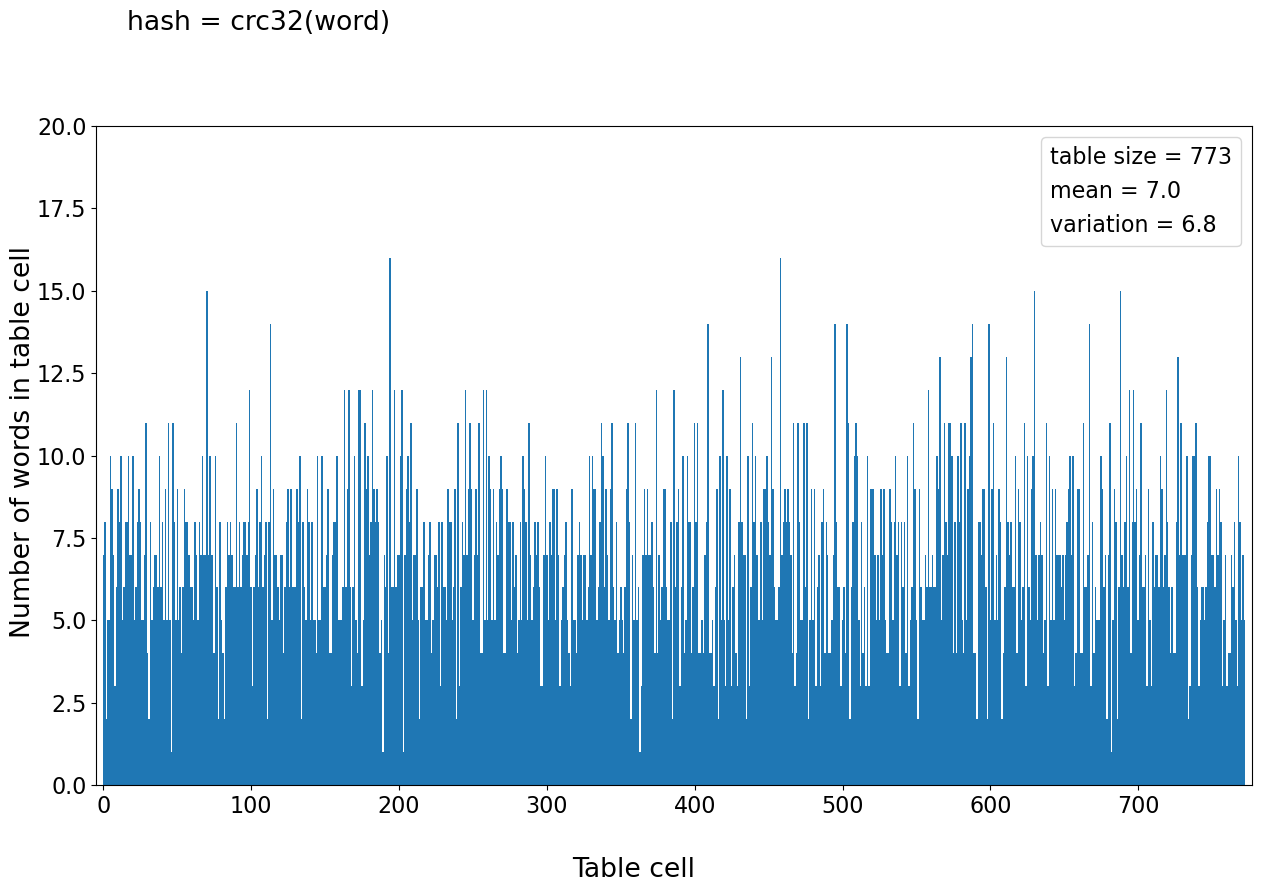

In [7]:
make_hist(8, results, 0, 20, 0, "hash = crc32(word)\n\n")

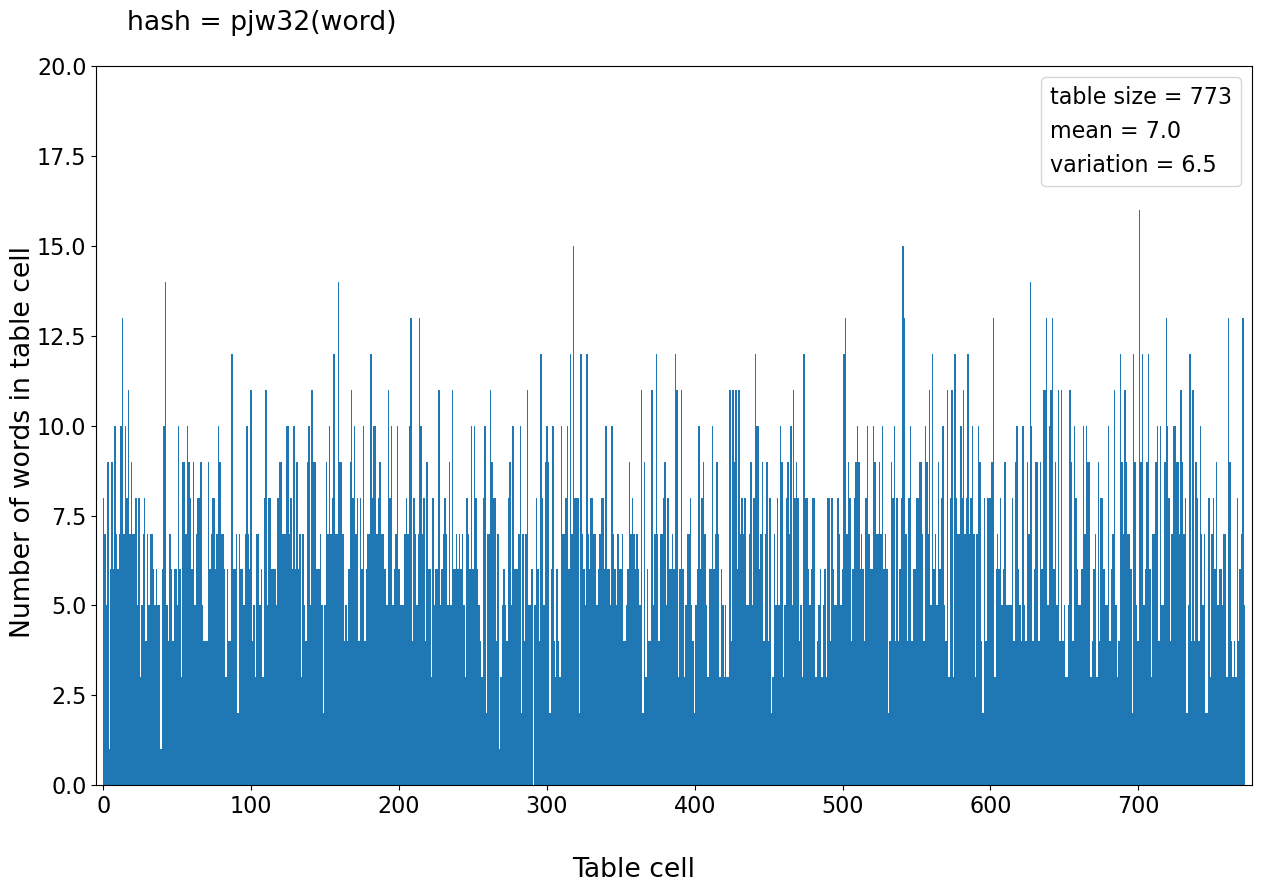

In [8]:
make_hist(9, results, 0, 20, 0, "hash = pjw32(word)")

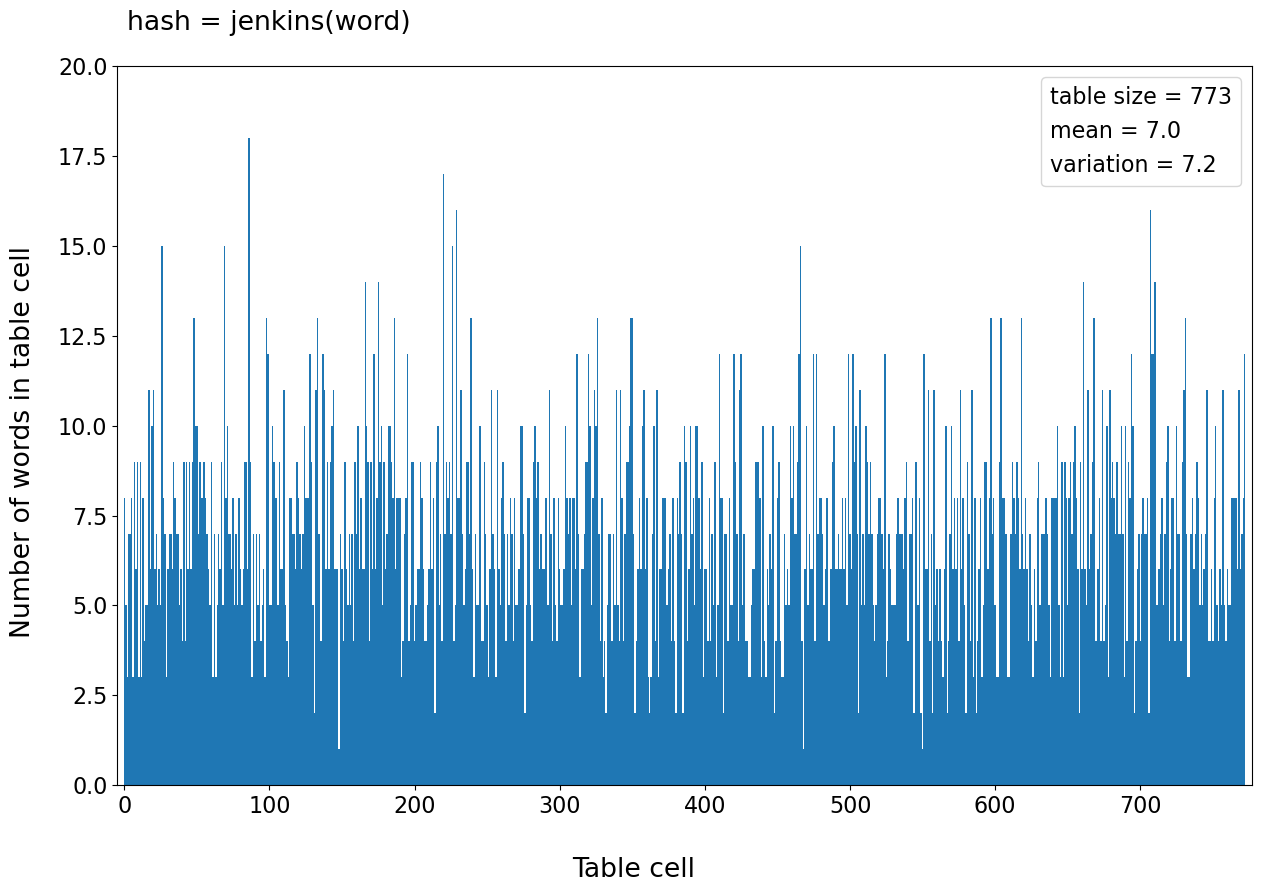

In [9]:
make_hist(10, results, 0, 20, 0, "hash = jenkins(word)")

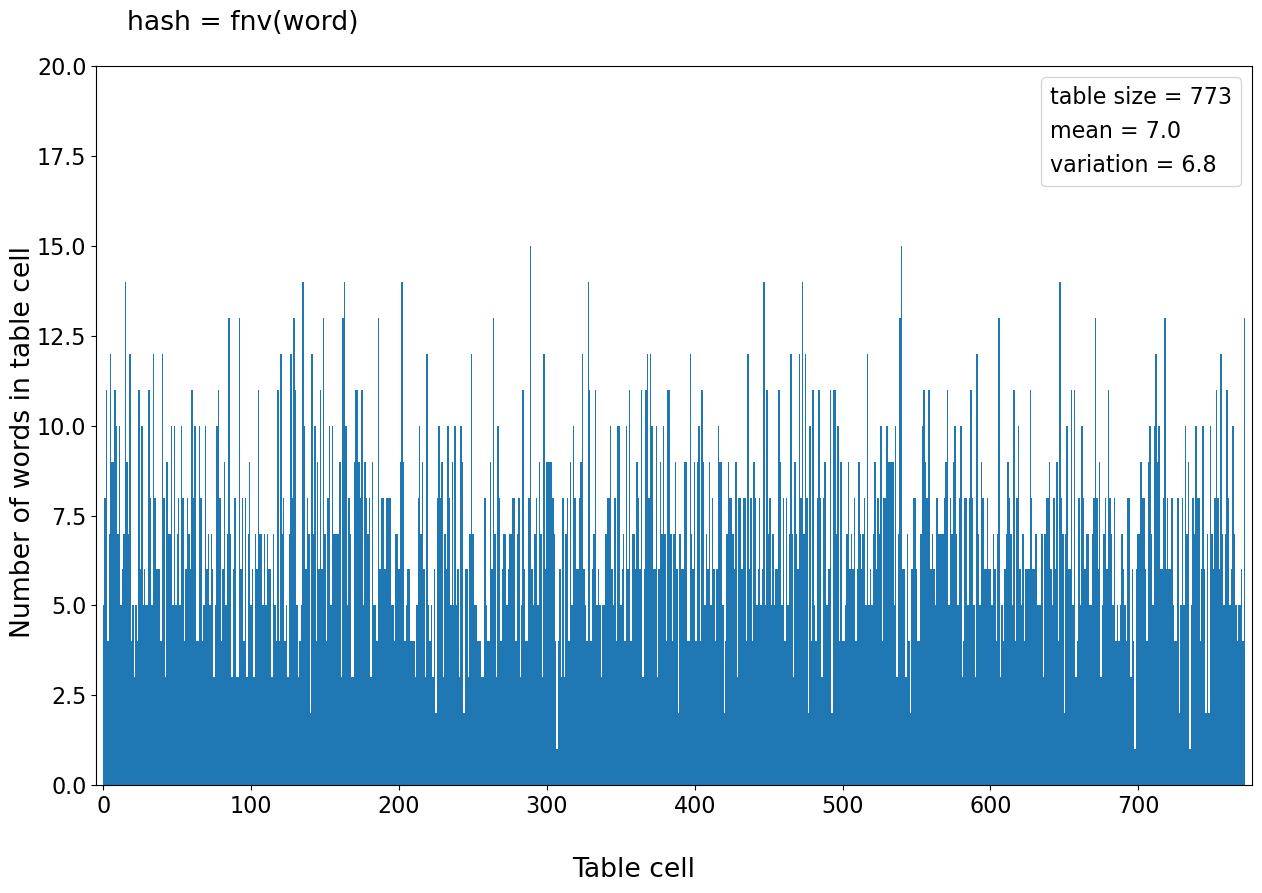

In [10]:
make_hist(11, results, 0, 20, 0, "hash = fnv(word)")

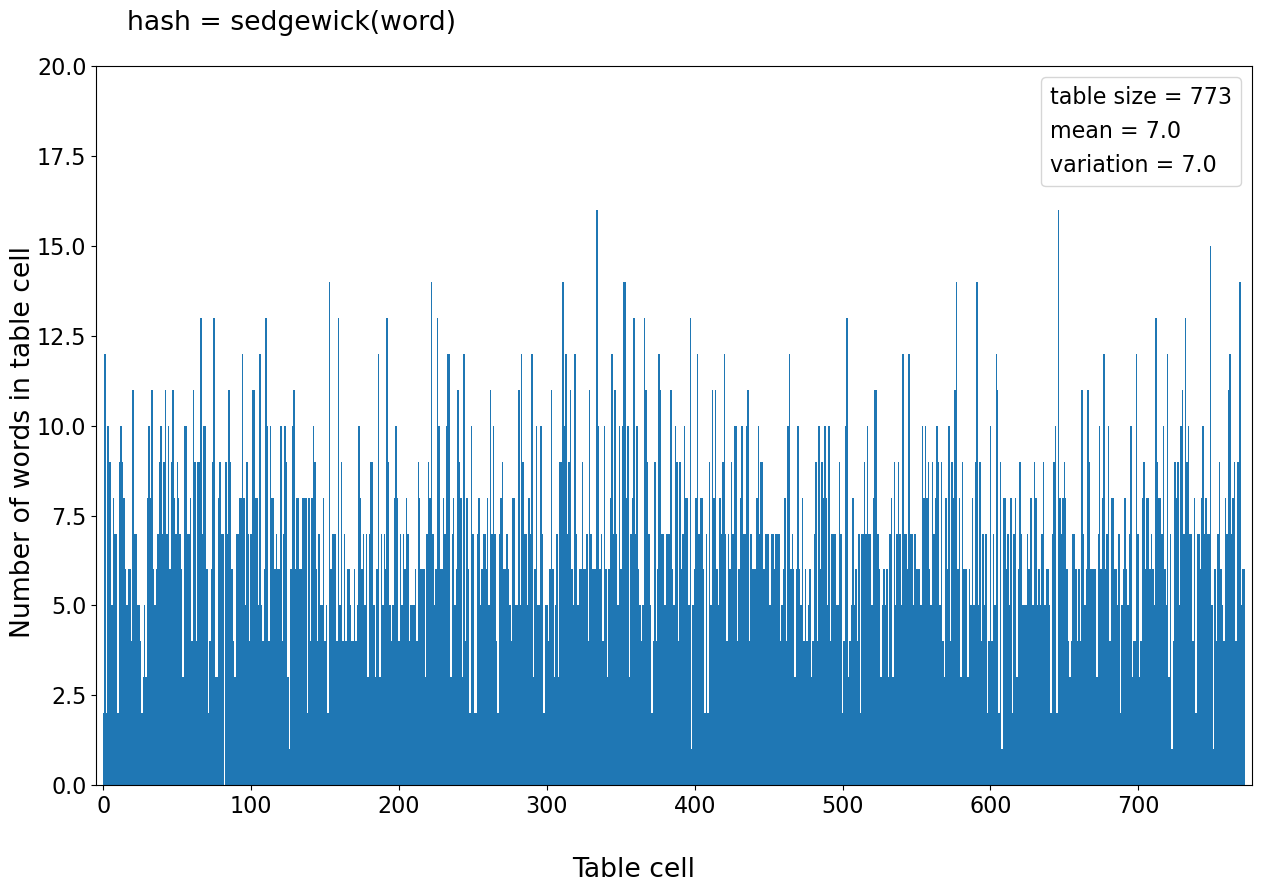

In [11]:
make_hist(12, results, 0, 20, 0, "hash = sedgewick(word)")

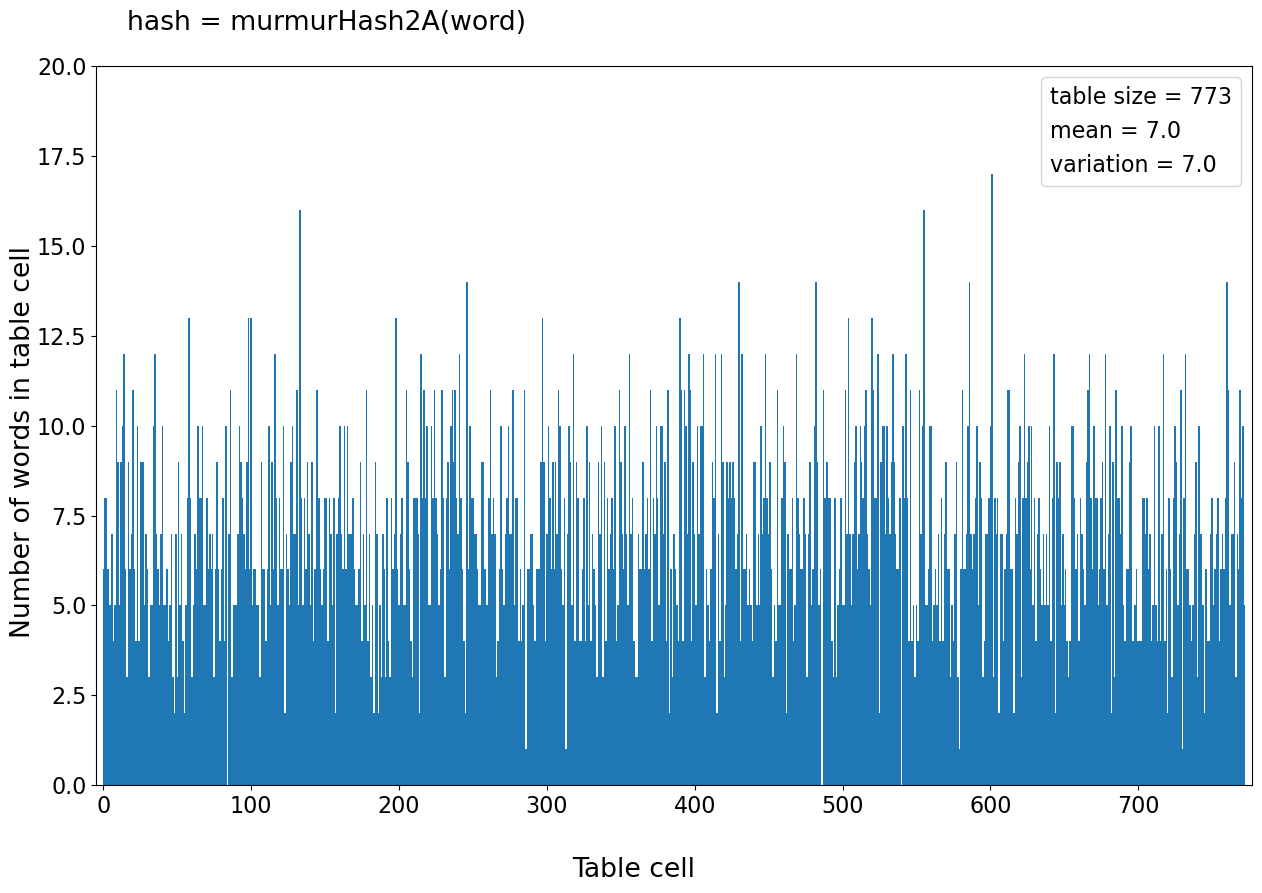

In [12]:
make_hist(13, results, 0, 20, 0, "hash = murmurHash2A(word)")

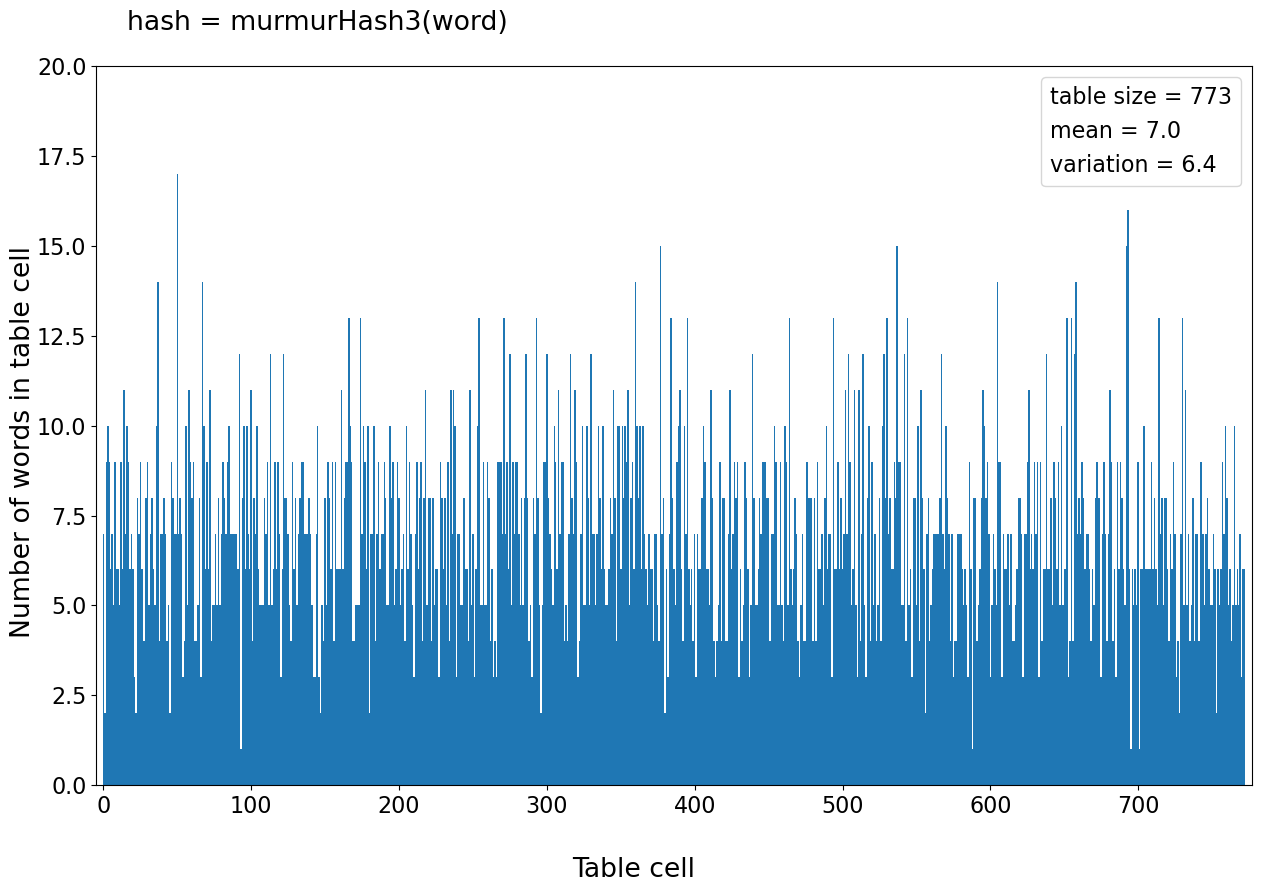

In [13]:
make_hist(14, results, 0, 20, 0, "hash = murmurHash3(word)")

In [6]:
print("| # | Хэш | Размер табл. | Мат. ожидание | Дисперсия |")
print("|:-:" * 5 + "|")

hashes = ["`0`", "`len(word)`", "`word[0]`", "`sum(word[i]) / len(word)`", "`sum(word[i])`", "`sum(word[i])`",
          "`ror() xor word[i]`", "`rol() xor word[i]`", "`crc32`", "`pjw32`", "`jenkins`", "`fnv`", "`sedgewick`",
          "`murmur2A`", "`murmur3`"]

res_i = [0, 2, 1, 5, 4, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14]

for i in range(len(hashes)):
    print("| %d | %s | %d | %.1f | %.1f |" % (i + 1, hashes[i], len(results[res_i[i]]), np.mean(results[res_i[i]]), np.var(results[res_i[i]])))


| # | Хэш | Размер табл. | Мат. ожидание | Дисперсия |
|:-:|:-:|:-:|:-:|:-:|
| 1 | `0` | 773 | 7.0 | 37870.0 |
| 2 | `len(word)` | 773 | 7.0 | 5103.2 |
| 3 | `word[0]` | 773 | 7.0 | 1534.0 |
| 4 | `sum(word[i]) / len(word)` | 773 | 7.0 | 2599.1 |
| 5 | `sum(word[i])` | 100 | 54.1 | 370.6 |
| 6 | `sum(word[i])` | 773 | 7.0 | 35.5 |
| 7 | `ror() xor word[i]` | 773 | 7.0 | 38.2 |
| 8 | `rol() xor word[i]` | 773 | 7.0 | 20.1 |
| 9 | `crc32` | 773 | 7.0 | 6.8 |
| 10 | `pjw32` | 773 | 7.0 | 6.5 |
| 11 | `jenkins` | 773 | 7.0 | 7.2 |
| 12 | `fnv` | 773 | 7.0 | 6.8 |
| 13 | `sedgewick` | 773 | 7.0 | 7.0 |
| 14 | `murmur2A` | 773 | 7.0 | 7.0 |
| 15 | `murmur3` | 773 | 7.0 | 6.4 |


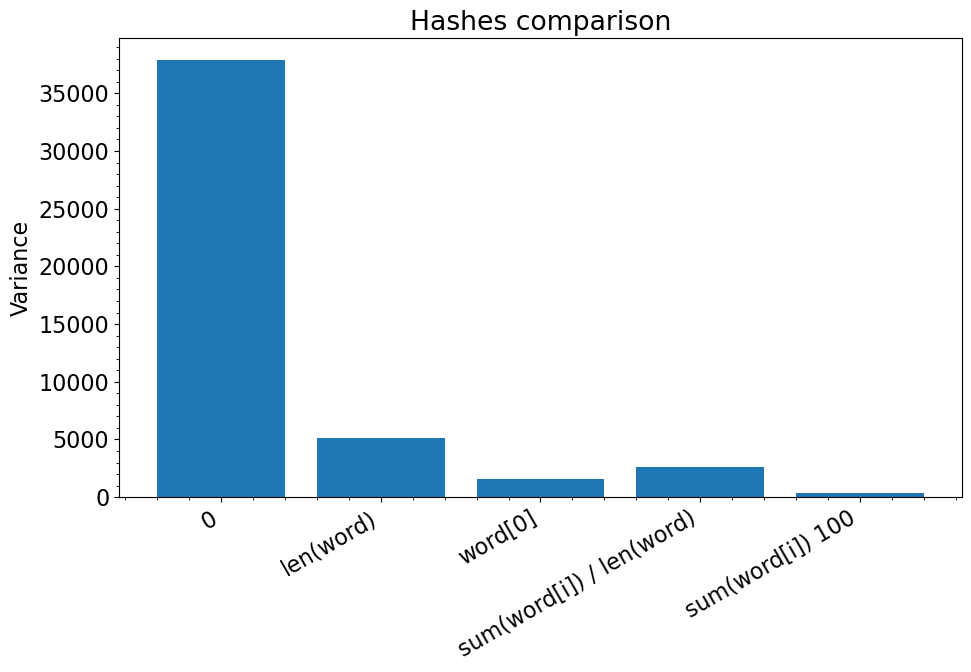

In [40]:
mpl.rcParams['font.size'] = 16
plt.figure(figsize = (10,7), facecolor = "white")

bar_colors = ['tab:red', 'tab:blue']

hashes = ["`0`", "`len(word)`", "`word[0]`", "`sum(word[i]) / len(word)`", "`sum(word[i]) 100`", "`sum(word[i]) 773`",
          "`ror() xor word[i]`", "`rol() xor word[i]`", "`crc32`", "`pjw32`", "`jenkins`", "`fnv`", "`sedgewick`",
          "`murmur2A`", "`murmur3`"]

bars = []
max_label_len = max([len(i) for i in hashes])
for i in range(0, 5):
    bars.append(plt.bar(hashes[i].replace("`", ""), np.var(results[res_i[i]]), color = 'tab:blue'))


plt.xticks(rotation=30, ha='right')
plt.ylabel("Variance")
plt.title("Hashes comparison")

plt.minorticks_on()
plt.tight_layout()

plt.savefig("../img/hashes_bar_chart1.png")
plt.show()

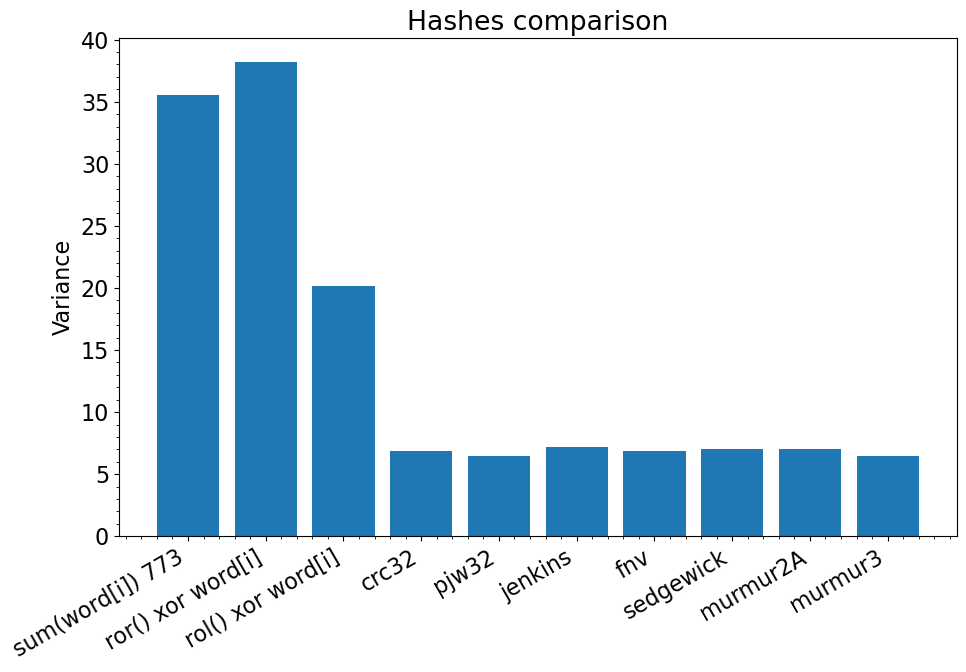

In [41]:
mpl.rcParams['font.size'] = 16
plt.figure(figsize = (10,7), facecolor = "white")

bar_colors = ['tab:red', 'tab:blue']

hashes = ["`0`", "`len(word)`", "`word[0]`", "`sum(word[i]) / len(word)`", "`sum(word[i]) 100`", "`sum(word[i]) 773`",
          "`ror() xor word[i]`", "`rol() xor word[i]`", "`crc32`", "`pjw32`", "`jenkins`", "`fnv`", "`sedgewick`",
          "`murmur2A`", "`murmur3`"]

bars = []
max_label_len = max([len(i) for i in hashes])
for i in range(5, len(hashes)):
    bars.append(plt.bar(hashes[i].replace("`", ""), np.var(results[res_i[i]]), color = 'tab:blue'))


plt.xticks(rotation=30, ha='right')
plt.ylabel("Variance")
plt.title("Hashes comparison")

plt.minorticks_on()
plt.tight_layout()

plt.savefig("../img/hashes_bar_chart2.png")
plt.show()